#HW1 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Part 1: Data Loading and First Look

## (Q1) Loading the dataset

In [2]:
dataset = pd.read_csv("virus_data.csv")
dataset.shape

(1250, 25)

## (Q2)

In [3]:
dataset['conversations_per_day'].value_counts()

conversations_per_day
2     220
4     207
3     201
5     153
6     125
1     115
7      77
8      52
10     33
9      23
11     14
12     10
13      7
16      4
14      4
17      3
21      2
Name: count, dtype: int64

## (Q3)

In [4]:
dataset.dtypes

patient_id                 int64
age                        int64
sex                       object
weight                   float64
blood_type                object
current_location           int64
num_of_siblings            int64
happiness_score            int64
household_income         float64
PCR_02                   float64
conversations_per_day      int64
sugar_levels               int64
sport_activity             int64
pcr_date                  object
PCR_01                   float64
PCR_03                   float64
PCR_04                   float64
PCR_05                   float64
PCR_06                   float64
PCR_07                   float64
PCR_08                   float64
PCR_09                   float64
PCR_10                   float64
spread                     int64
risk                       int64
dtype: object

## (Q4)

In [5]:
random_state = 17 + 75
train, test = train_test_split(dataset, test_size=0.2, random_state=random_state)
train.shape, test.shape

((1000, 25), (250, 25))

# Part 2: Missing Values and Outliers

## (Q5)

In [6]:
train.isnull().sum()

patient_id                 0
age                        0
sex                        0
weight                     0
blood_type                 0
current_location           0
num_of_siblings            0
happiness_score            0
household_income         108
PCR_02                    58
conversations_per_day      0
sugar_levels               0
sport_activity             0
pcr_date                   0
PCR_01                     0
PCR_03                     0
PCR_04                     0
PCR_05                     0
PCR_06                     0
PCR_07                     0
PCR_08                     0
PCR_09                     0
PCR_10                     0
spread                     0
risk                       0
dtype: int64

In [7]:
test.isnull().sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         31
PCR_02                   16
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

## (Q6)

In [8]:
def plot_box(series, title, xlabel):
    cleaned_series = series.dropna()
    plt.figure(figsize=(8, 6))
    plt.boxplot(cleaned_series,
    vert=False)
    plt.xlabel(xlabel)
    plt.title(title)

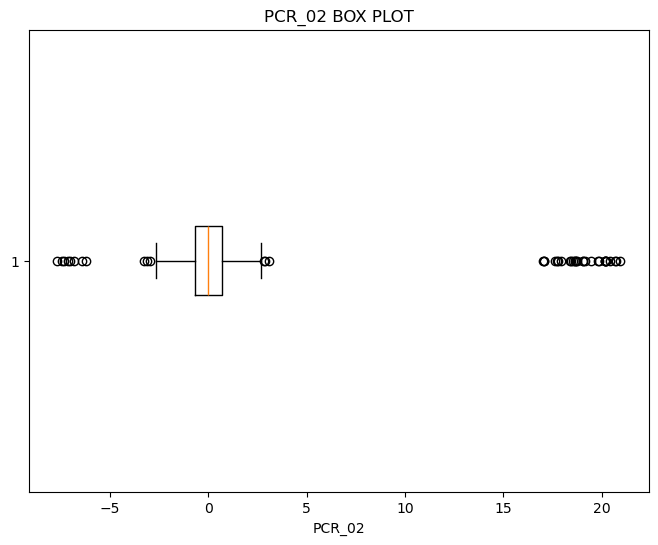

In [9]:
plot_box(train['PCR_02'], 'PCR_02 BOX PLOT', 'PCR_02')

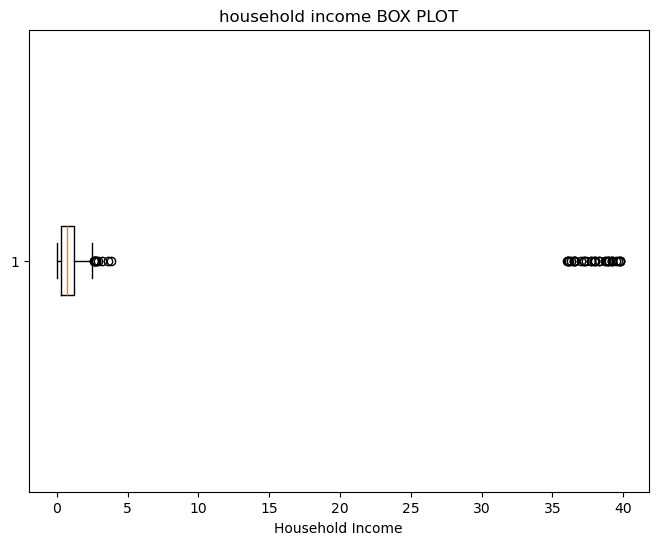

In [10]:
plot_box(train['household_income'], 'household income BOX PLOT', 'Household Income')

In [11]:
print(train['household_income'].describe())
print(train['PCR_02'].describe())

count    892.000000
mean       2.181166
std        7.041752
min        0.000000
25%        0.300000
50%        0.700000
75%        1.200000
max       39.800000
Name: household_income, dtype: float64
count    942.000000
mean       0.495988
std        3.519246
min       -7.717023
25%       -0.688169
50%       -0.005455
75%        0.664530
max       20.958852
Name: PCR_02, dtype: float64


## (Q7)

In [12]:
## fill missing values with median
filled_train_median = train.fillna({'household_income':train.household_income.median(), 'PCR_02':train.PCR_02.median()})
filled_test_median = test.fillna({'household_income':train.household_income.median(), 'PCR_02':train.PCR_02.median()})

print(filled_train_median['household_income'].describe())
print(filled_train_median['PCR_02'].describe())

count    1000.000000
mean        2.021200
std         6.666119
min         0.000000
25%         0.400000
50%         0.700000
75%         1.200000
max        39.800000
Name: household_income, dtype: float64
count    1000.000000
mean        0.466904
std         3.417570
min        -7.717023
25%        -0.649485
50%        -0.005455
75%         0.616711
max        20.958852
Name: PCR_02, dtype: float64


# Part 3: Warming up with k-Nearest Neighbors

# Basic data exploration

## (Q8)

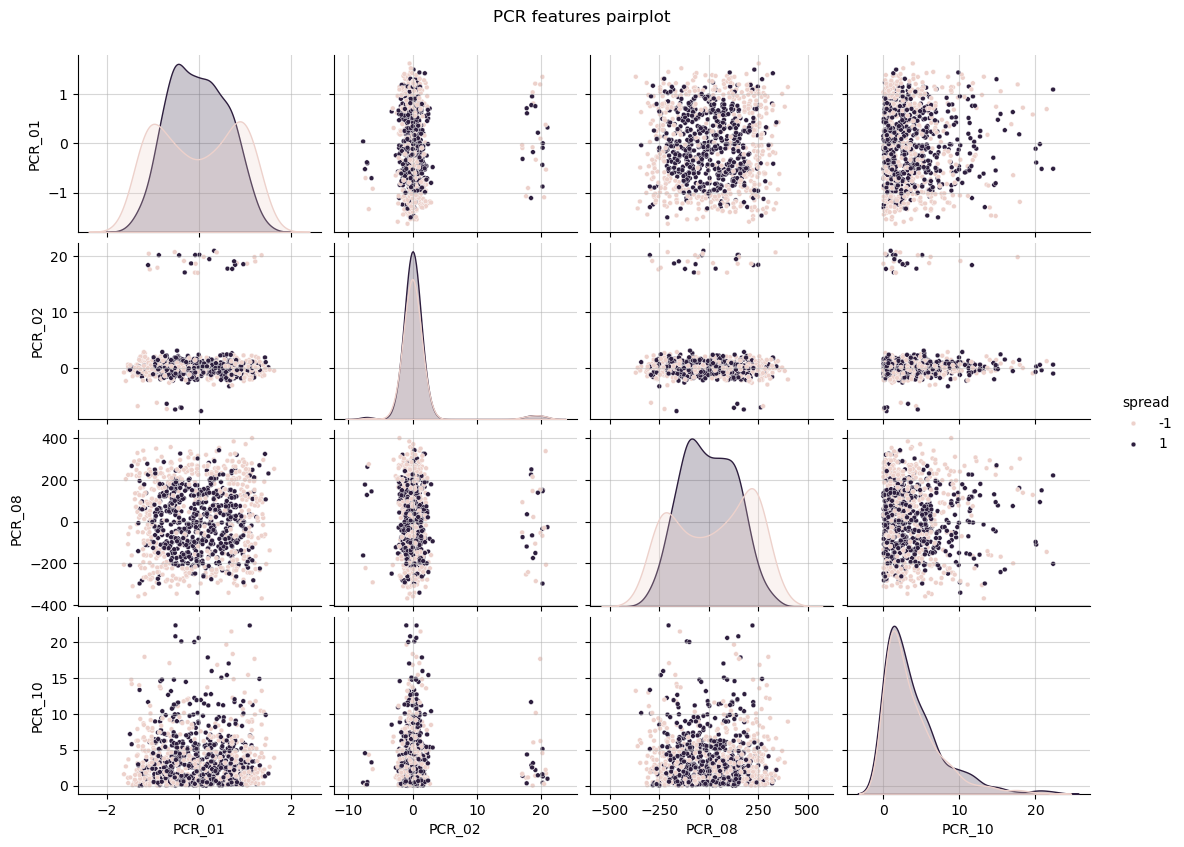

In [13]:
g=sns.pairplot(filled_train_median,
               vars=['PCR_01' , 'PCR_02' , 'PCR_08', 'PCR_10'],
               hue="spread",
               plot_kws={"s": 12})
g.fig.suptitle("PCR features pairplot", y=1.04)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)

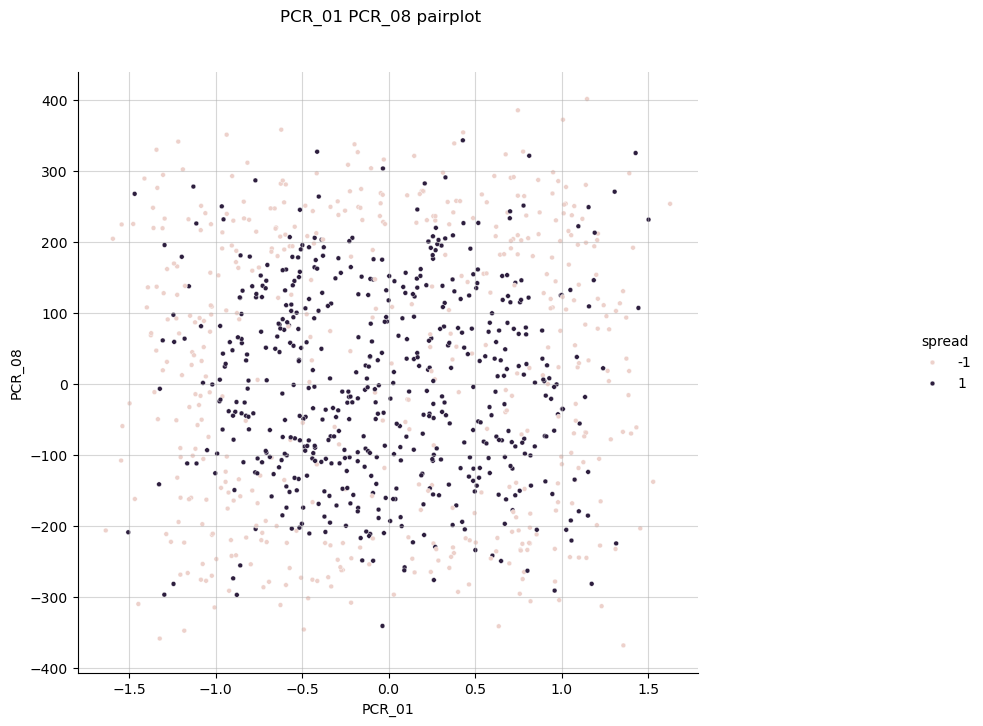

In [14]:
g=sns.pairplot(filled_train_median,
               x_vars=['PCR_01'],
               y_vars=['PCR_08'],
               hue="spread",
               plot_kws={"s": 12})
g.fig.suptitle("PCR_01 PCR_08 pairplot", y=1.04)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)

## (Q9)

In [15]:
print("Correlation between PCR_01 and spread is: {:.4f}".format(filled_train_median['PCR_01'].corr(filled_train_median['spread'])))
print("Correlation between PCR_08 and spread is: {:.4f}".format(filled_train_median['PCR_08'].corr(filled_train_median['spread'])))

Correlation between PCR_01 and spread is: 0.0015
Correlation between PCR_08 and spread is: -0.0711


# k-NN implementation

## Task D

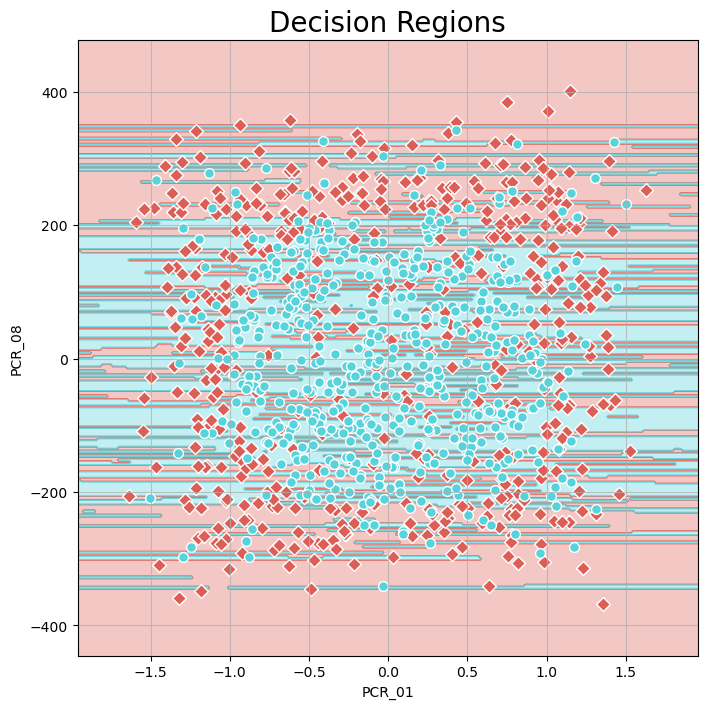

Train accuracy is: 0.630
Test accuracy is: 0.572


In [16]:
import visualize_clf
import kNN

# temporal data frames for PCR_01 and PCR_08
temp_df = filled_train_median[['PCR_01','PCR_08']]
temp_test_df = filled_test_median[['PCR_01','PCR_08']]

# kNN model
model = kNN.kNN(n_neighbors=1)
model.fit(temp_df,filled_train_median['spread'])
visualize_clf.visualize_clf(model, temp_df, filled_train_median['spread'], "Decision Regions", "PCR_01", "PCR_08")

# train and test accuracy
print("Train accuracy is: {:.3f}".format(model.score(temp_df, filled_train_median['spread'])))
print("Test accuracy is: {:.3f}".format(model.score(temp_test_df, filled_test_median['spread'])))

# Data Normalization

## (Q12)

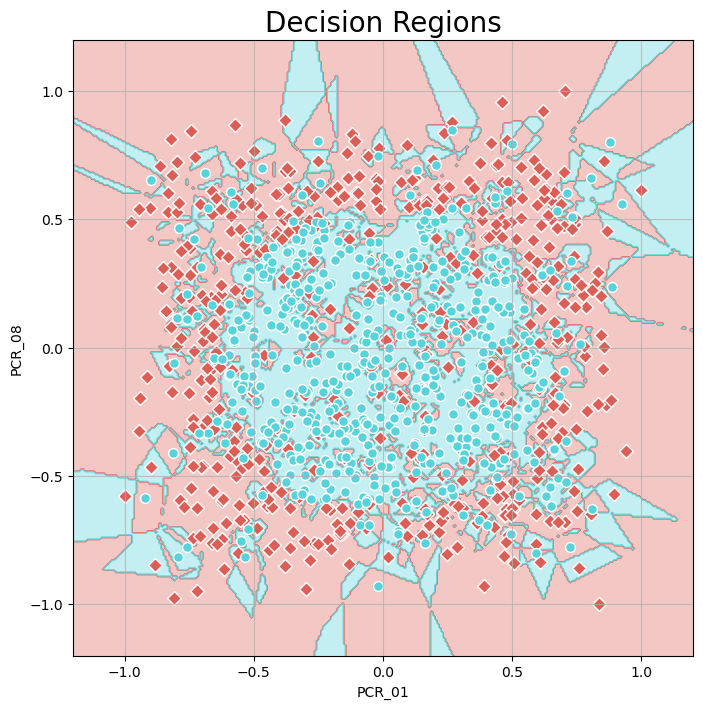

Train accuracy is: 0.693
Test accuracy is: 0.660


In [17]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(temp_df)
normed_temp_df = scaler.transform(temp_df)
normed_temp_test_df = scaler.transform(temp_test_df)

# kNN model k=1
model = kNN.kNN(n_neighbors=1)
model.fit(normed_temp_df, filled_train_median['spread'])
visualize_clf.visualize_clf(model, normed_temp_df, filled_train_median['spread'], "Decision Regions", "PCR_01", "PCR_08")

# train and test accuracy
print("Train accuracy is: {:.3f}".format(model.score(normed_temp_df, filled_train_median['spread'])))
print("Test accuracy is: {:.3f}".format(model.score(normed_temp_test_df, filled_test_median['spread'])))


## (Q13)

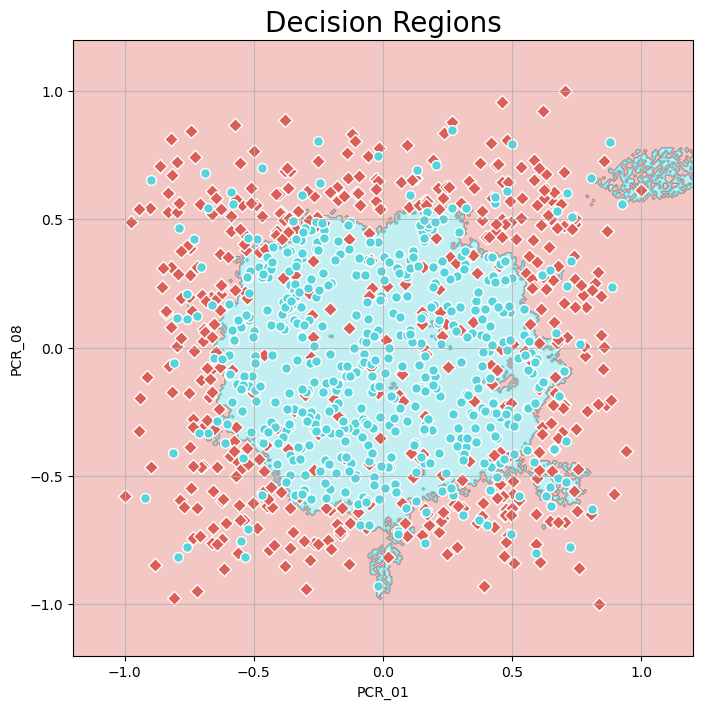

Train accuracy is: 0.806
Test accuracy is: 0.768


In [18]:
# kNN model k=9
model = kNN.kNN(n_neighbors=9)
model.fit(normed_temp_df, filled_train_median['spread'])
visualize_clf.visualize_clf(model, normed_temp_df, filled_train_median['spread'], "Decision Regions", "PCR_01", "PCR_08")
# train and test accuracy
print("Train accuracy is: {:.3f}".format(model.score(normed_temp_df, filled_train_median['spread'])))
print("Test accuracy is: {:.3f}".format(model.score(normed_temp_test_df, filled_test_median['spread'])))

# Part 4: Data Exploration

# Task D

In [19]:
# define special property feature
df_bool= pd.DataFrame({'SpecialProperty' : filled_train_median["blood_type"].isin(["O+", "B+"])})
filled_train_median_bool = pd.concat([filled_train_median, df_bool], axis=1)
filled_train_median_bool.drop(columns=['blood_type'], inplace=True)

# Univariate Analysis

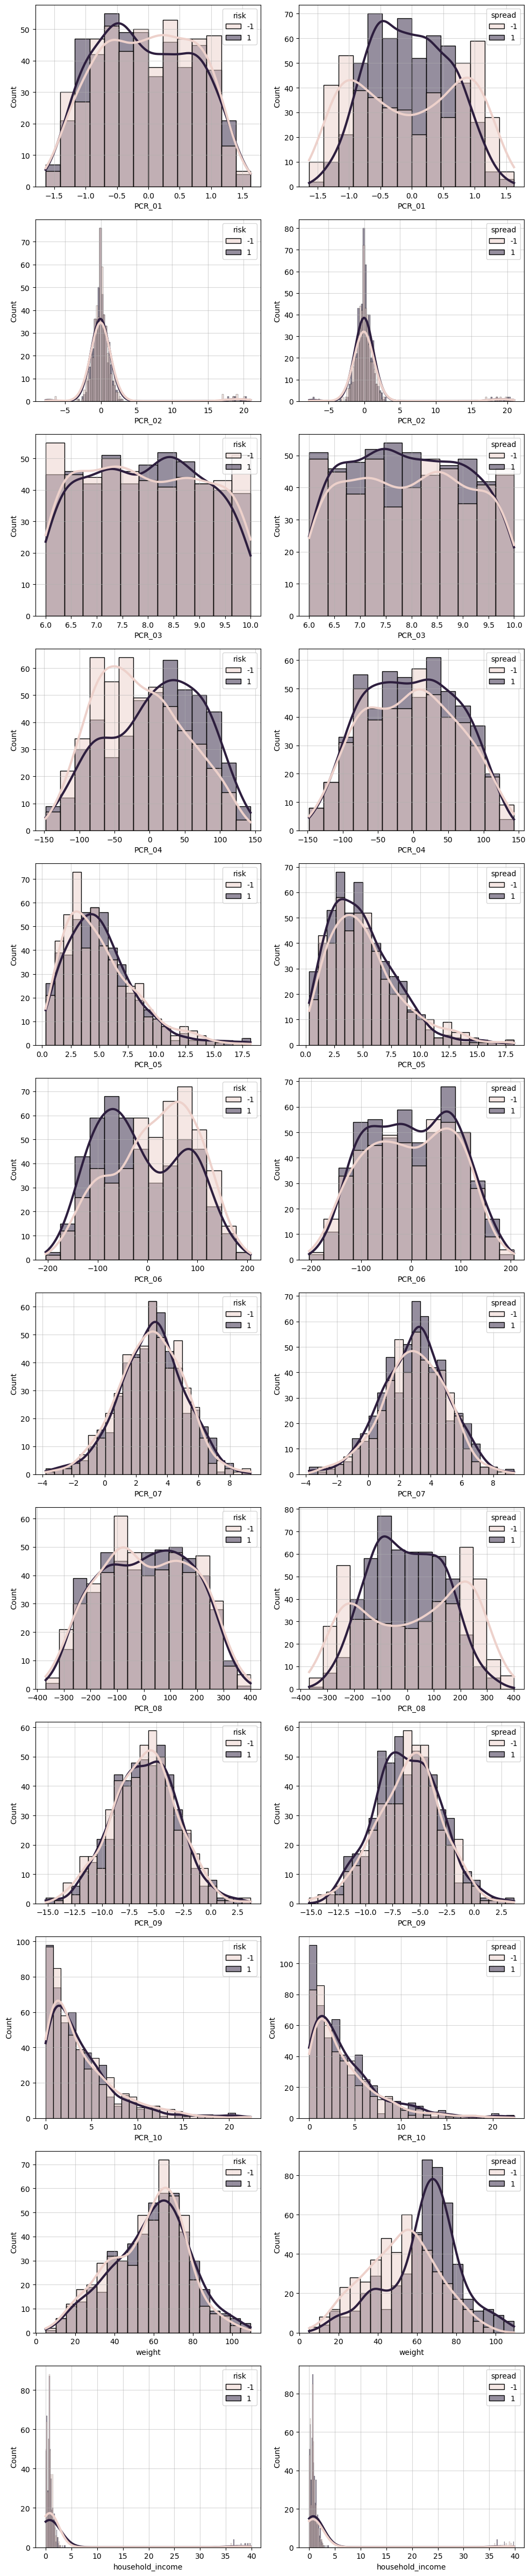

In [20]:
COL_NAME = ['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'weight', 'household_income']
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
    column = COL_NAME[row]
    for j, cls in enumerate(["risk", "spread"]):
        plt.subplot(ROWS,COLS, row * COLS + 1 + j)
        isContinuous = "float" in filled_train_median_bool[column].dtype.name
        sns.histplot(data=filled_train_median_bool, x=column, hue=cls, line_kws={"linewidth": 3},
        kde=isContinuous, multiple="layer" if isContinuous else "dodge")
        plt.grid(alpha=0.5)
plt.tight_layout()

# (Q15)

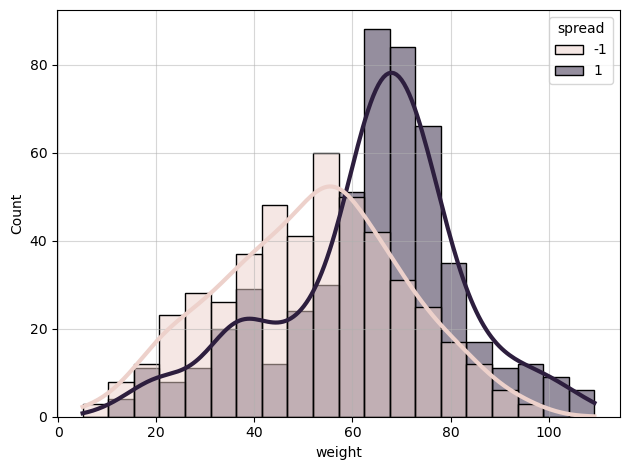

In [21]:
plt.figure()
sns.histplot(data=filled_train_median_bool, x="weight", hue="spread", line_kws={"linewidth": 3},
kde=True, multiple="layer")
plt.grid(alpha=0.5)
plt.tight_layout()

# (Q16)

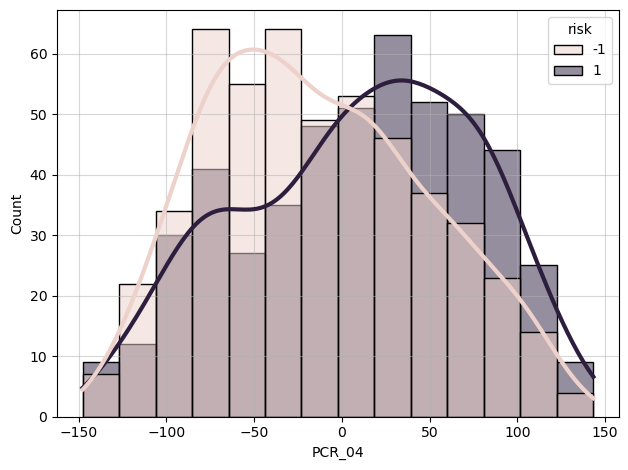

In [22]:
plt.figure()
sns.histplot(data=filled_train_median_bool, x="PCR_04", hue="risk", line_kws={"linewidth": 3},
kde=True, multiple="layer")
plt.grid(alpha=0.5)
plt.tight_layout()

# Bivariate Analysis

# (Q17)

In [23]:
# split the data by the special property feature
filled_train_median_true = filled_train_median_bool.groupby('SpecialProperty').get_group(True)
filled_train_median_false = filled_train_median_bool.groupby('SpecialProperty').get_group(False)

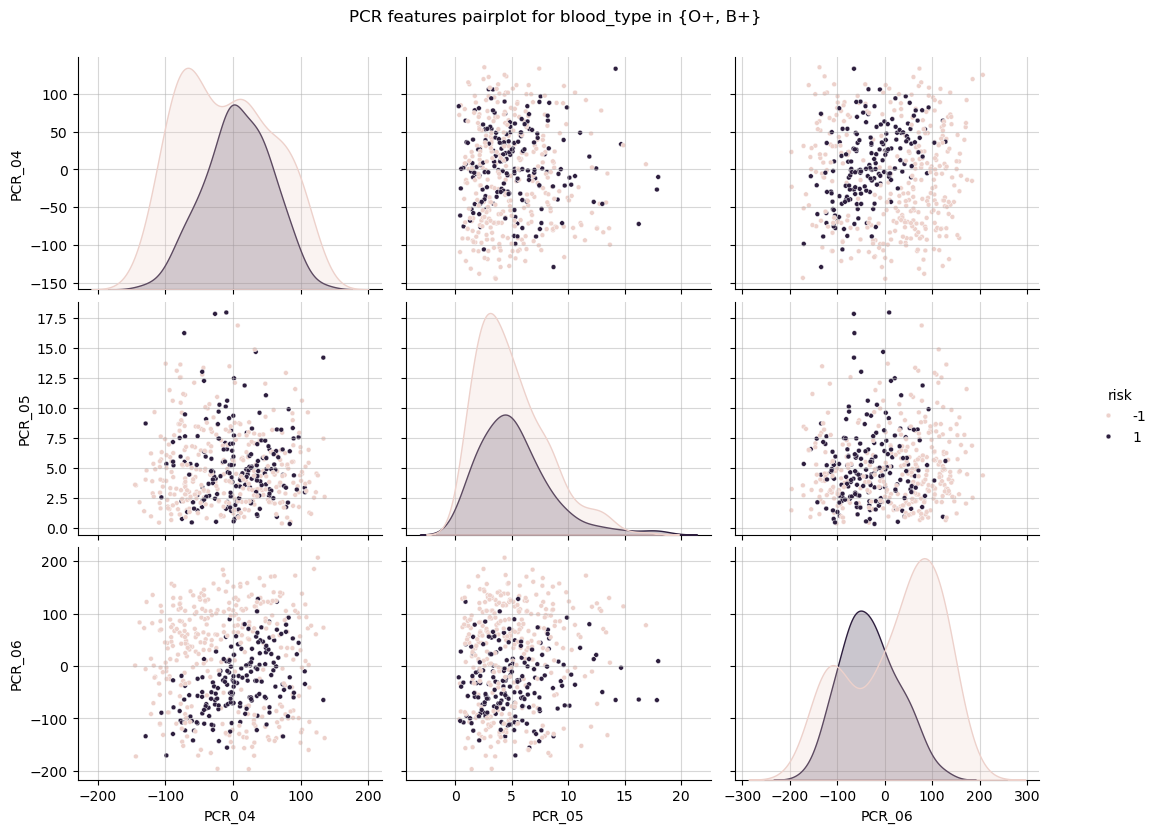

In [24]:
g=sns.pairplot(filled_train_median_true,
               vars=['PCR_04' , 'PCR_05' , 'PCR_06'],
               hue="risk",
               plot_kws={"s": 12})
g.fig.suptitle("PCR features pairplot for blood_type in {O+, B+}", y=1.04)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)

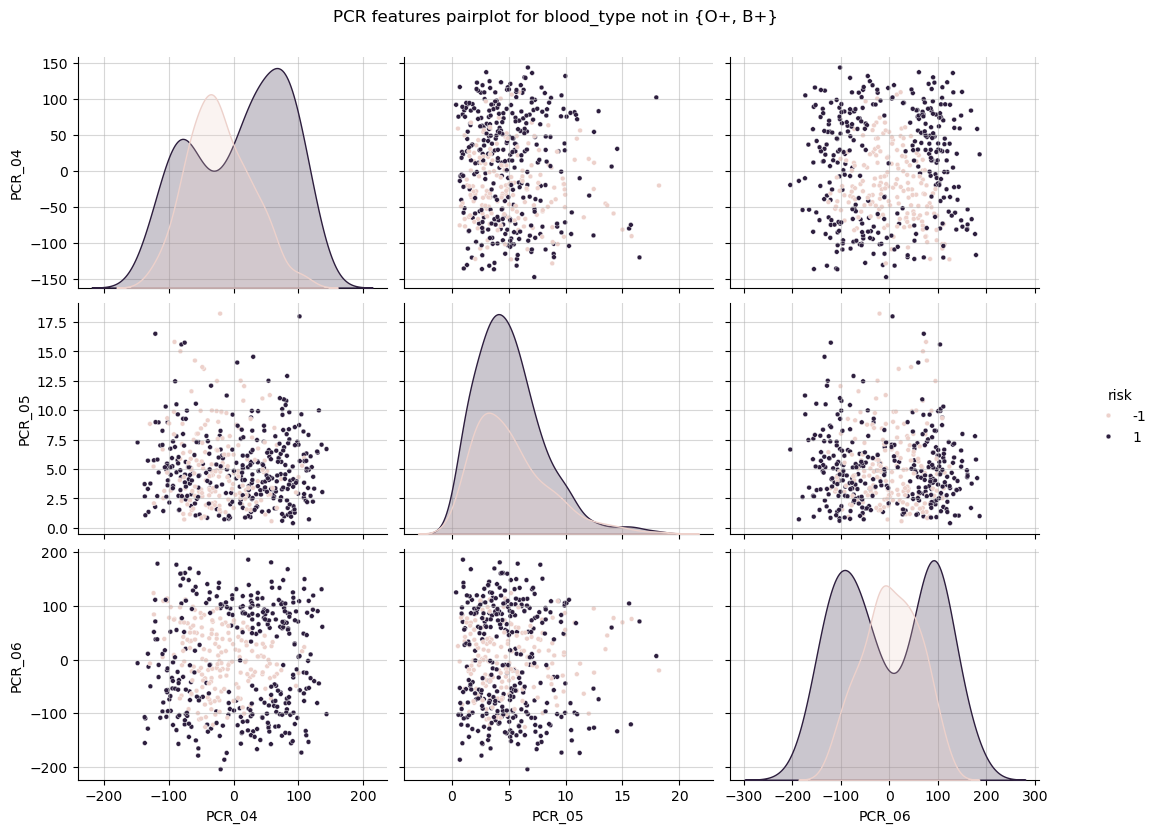

In [25]:
g=sns.pairplot(filled_train_median_false,
               vars=['PCR_04' , 'PCR_05' , 'PCR_06'],
               hue="risk",
               plot_kws={"s": 12})
g.fig.suptitle("PCR features pairplot for blood_type not in {O+, B+}", y=1.04)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)

# (Q18)

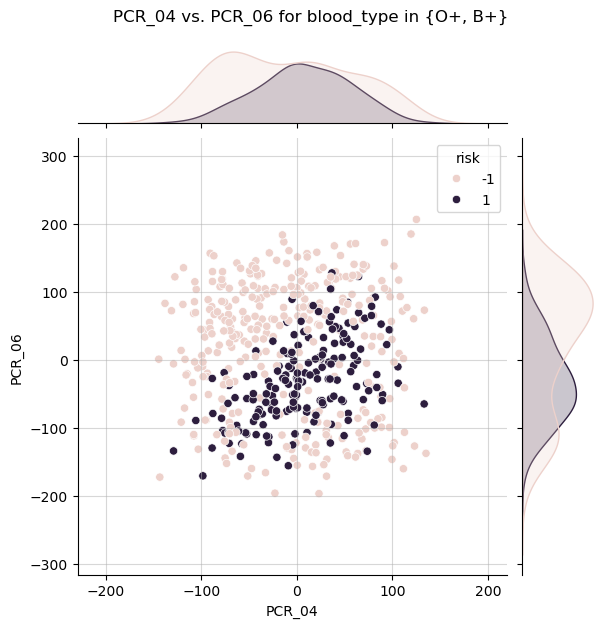

In [26]:
g = sns.jointplot(data=filled_train_median_true, x="PCR_04", y="PCR_06", hue="risk")
g.fig.suptitle("PCR_04 vs. PCR_06 for blood_type in {O+, B+}", y=1.04)
_ = g.ax_joint.grid(alpha=0.5)

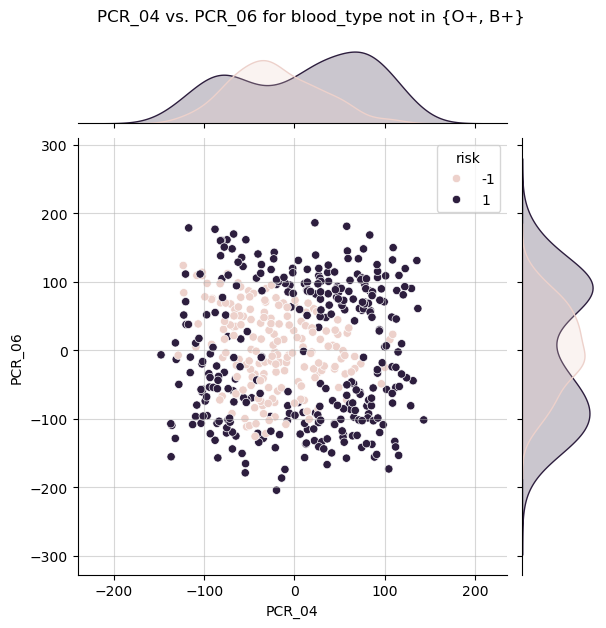

In [27]:
g = sns.jointplot(data=filled_train_median_false, x="PCR_04", y="PCR_06", hue="risk")
g.fig.suptitle("PCR_04 vs. PCR_06 for blood_type not in {O+, B+}", y=1.04)
_ = g.ax_joint.grid(alpha=0.5)

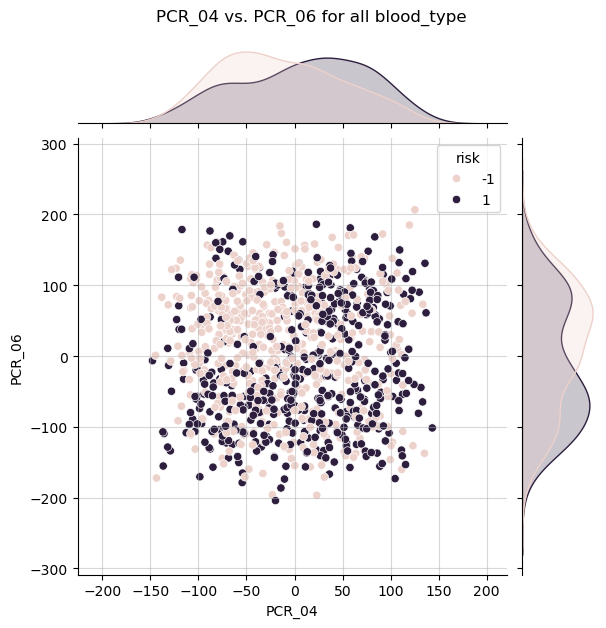

In [28]:
g = sns.jointplot(data=filled_train_median_bool, x="PCR_04", y="PCR_06", hue="risk")
g.fig.suptitle("PCR_04 vs. PCR_06 for all blood_type", y=1.04)
_ = g.ax_joint.grid(alpha=0.5)

# The risk target feature

# (Q19)

In [29]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  # %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

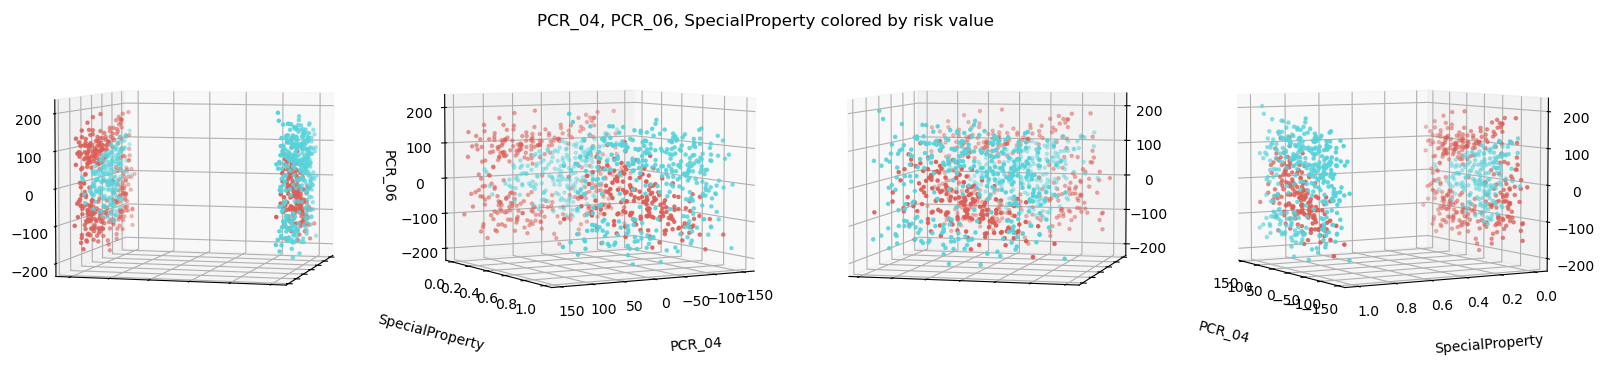

In [30]:
plot3d(filled_train_median_bool, "PCR_04", "SpecialProperty", "PCR_06", title="PCR_04, PCR_06, SpecialProperty colored by risk value", hue="risk", s=5)

## Part 5: More Data Normalization

In [31]:
from sklearn.preprocessing import StandardScaler

# scaler for minmax and standart
scaler_standart = StandardScaler()
scaler_minmax = MinMaxScaler(feature_range=(-1,1))

# temporal data frames for minmax and standart
temp_df_minmax = filled_train_median_bool[['PCR_01','PCR_03','PCR_04','PCR_06','PCR_08']]
temp_df_standart = filled_train_median_bool[['PCR_02','PCR_05','PCR_07','PCR_09','PCR_10']]
normed_filled_train_median_bool = filled_train_median_bool.copy()

# normalize the data
scaler_minmax.fit(temp_df_minmax)
scaler_standart.fit(temp_df_standart)
normed_filled_train_median_bool[['PCR_01','PCR_03','PCR_04','PCR_06','PCR_08']] = scaler_minmax.transform(temp_df_minmax)
normed_filled_train_median_bool[['PCR_02','PCR_05','PCR_07','PCR_09','PCR_10']] = scaler_standart.transform(temp_df_standart)

## Part 6: Data Preparation Pipeline

In [32]:
from prepare import prepare_data

# Prepare training set according to itself
train_df_prepared = prepare_data(train, train)
# Prepare test set according to the raw training set
test_df_prepared = prepare_data(train, test)